In [1]:
"""
Rohith, Rahul, and Jessica
Dataset from https://zenodo.org/record/3935636#.Y3vv-i-B1ZJ
""" 

'\nRohith, Rahul, and Jessica\nDataset from https://zenodo.org/record/3935636#.Y3vv-i-B1ZJ\n'

In [2]:
import os
import numpy as np 
import pandas as pd 
import seaborn as sns 
import scipy.stats
from scipy.stats import zscore
import statsmodels.stats.weightstats as sms
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt 

In [3]:
# Set up file stream access
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

person = input("Enter your name to set up correct file stream access \n")

# edit the path under your name to the path where you copied the final project data
# then run this cell, enter your name when prompted, and the data will be mounted to the notebook for easy access
if person == 'Jessica': 
  os.chdir("/content/drive/My Drive/DATA690/data")
elif person == 'Rahul': 
  os.chdir("/content/drive/My Drive/data/690")
elif person == 'Rohith': 
  os.chdir("/content/drive/My Drive/")
else: 
  print('Whoops! Make sure you have a user identified')

Mounted at /content/drive
Enter your name to set up correct file stream access 
Jessica


In [4]:
"""
Combine files for ease of analysis
"""
! paste -d "," clinical_data_id_age_gender.csv inflammation.csv stress.csv > clinical_data_all.csv
! head clinical_data_all.csv

Subject,id,Age,gender,IL1,IL6,TNF,PGJ2,PGE2,BDNF,NGF,Nitritos,MDA
crl,104,79,2,16.678,3.931,2.048844,0.482,224.1214,16132.89474,8924.651163,2.1932,2.455
crl,105,72,2,12.583,11.266,2.11641,0.553,130.97452,23047.36842,7738.604651,4.5203,2.455
crl,106,82,1,76.747,6.279,4.819018,0.708,98.36448,16001.31579,14240.93023,0.3833,3.98
crl,111,65,2,11.218,2.464,0.15701736,0.486,170.48108,21698.68421,15264.18605,-0.9096,7.031
crl,112,68,1,28.282,5.692,2.11641,0.454,86.50378,21928.94737,9664.186047,-0.3925,2.455
crl,117,89,2,20.774,-0.469,1.711018,0.54,104.82334,19955.26316,8381.176471,-1.6853,2.455
crl,118,87,2,39.204,54.981,2.994758,0.531,68.65228,23330.26316,6161.860465,-2.9781,1.693
crl,122,74,2,73.334,10.093,12.791718,0.51,161.37676,9902.727273,14912,-2.7196,1.693
crl,124,75,2,81.525,3.345,4.95415,0.487,76.55644,17238.15789,4045.581395,0.1247,2.455


In [5]:
"""
subject column - crl is "control, ea is "Alzheimers Disease", tb is "Late Onset Bipolar Disorder"
Il1, Il6, TNF, PGJ2, PGE2, BDNF, NGF columns - measurements of specific biomarkers in subject's blood
Nitritos, MDA columns - treatment measurements, IGNORE
"""
# create dataframe from large combined file
filepath = "clinical_data_all.csv"
df = pd.read_csv(filepath, sep=",", header=0, engine="c")
df

,Subject,id,Age,gender,IL1,IL6,TNF,PGJ2,PGE2,BDNF,NGF,Nitritos,MDA
0,crl,104,79,2,16.678,3.931,2.048844,0.482,224.12140,16132.894740,8924.651163,2.1932,2.455
1,crl,105,72,2,12.583,11.266,2.116410,0.553,130.97452,23047.368420,7738.604651,4.5203,2.455
2,crl,106,82,1,76.747,6.279,4.819018,0.708,98.36448,16001.315790,14240.930230,0.3833,3.980
3,crl,111,65,2,11.218,2.464,0.157017,0.486,170.48108,21698.684210,15264.186050,-0.9096,7.031
4,crl,112,68,1,28.282,5.692,2.116410,0.454,86.50378,21928.947370,9664.186047,-0.3925,2.455
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,tb,334,76,1,26.543,5.503,1.490615,0.654,102.68020,9850.909091,6493.770492,1.8214,1.693
74,tb,336,55,1,14.641,0.676,0.475693,0.643,243.25520,12291.818180,8369.180328,5.8902,0.930
75,tb,338,81,1,14.641,1.641,4.197074,0.577,333.28680,6969.090909,11642.950820,0.8041,1.693
76,tb,339,60,1,31.303,6.469,3.046830,0.597,126.37240,6437.272727,11770.819670,1.0584,1.693


In [6]:
# rename some columns for clarity and drop some columns we will not use
df.rename(columns={"Subject":"Condition", "id":"ID", "gender":"Gender"}, inplace=True)
df.drop(columns=["Nitritos", "MDA"], inplace=True)
df

,Condition,ID,Age,Gender,IL1,IL6,TNF,PGJ2,PGE2,BDNF,NGF
0,crl,104,79,2,16.678,3.931,2.048844,0.482,224.12140,16132.894740,8924.651163
1,crl,105,72,2,12.583,11.266,2.116410,0.553,130.97452,23047.368420,7738.604651
2,crl,106,82,1,76.747,6.279,4.819018,0.708,98.36448,16001.315790,14240.930230
3,crl,111,65,2,11.218,2.464,0.157017,0.486,170.48108,21698.684210,15264.186050
4,crl,112,68,1,28.282,5.692,2.116410,0.454,86.50378,21928.947370,9664.186047
...,...,...,...,...,...,...,...,...,...,...,...
73,tb,334,76,1,26.543,5.503,1.490615,0.654,102.68020,9850.909091,6493.770492
74,tb,336,55,1,14.641,0.676,0.475693,0.643,243.25520,12291.818180,8369.180328
75,tb,338,81,1,14.641,1.641,4.197074,0.577,333.28680,6969.090909,11642.950820
76,tb,339,60,1,31.303,6.469,3.046830,0.597,126.37240,6437.272727,11770.819670


In [7]:
# get summary statistics 
df.describe()

,ID,Age,Gender,IL1,IL6,TNF,PGJ2,PGE2,BDNF,NGF
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,229.871795,74.923077,1.448718,29.434571,6.707346,3.374383,0.570224,129.112214,17790.681046,10317.898821
std,74.929986,8.726388,0.500582,28.477569,11.784815,2.732700,0.056609,78.956490,6246.040057,4027.645769
min,104.000000,55.000000,1.000000,5.074000,-2.817000,-0.248374,0.454000,48.840180,3711.818182,2808.372093
25%,161.250000,69.250000,1.000000,14.641000,1.192000,1.579571,0.528000,85.604545,13716.740430,7126.976744
50%,226.500000,75.500000,1.000000,20.091000,2.904500,2.859627,0.562500,103.283550,17686.818180,10564.929110
75%,305.750000,82.000000,2.000000,36.590500,6.766000,4.180159,0.604000,144.396560,22106.578945,12925.963800
max,340.000000,89.000000,2.000000,219.349000,56.448000,12.791718,0.765000,539.717600,33757.894740,22182.769230


In [8]:
# check for null values
print(df.isna().sum())

Condition    0
ID           0
Age          0
Gender       0
IL1          0
IL6          0
TNF          0
PGJ2         0
PGE2         0
BDNF         0
NGF          0
dtype: int64


male      43
female    35
Name: Gender, dtype: int64


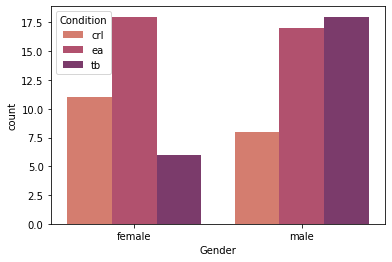

In [9]:
# get value counts for gender param and a histogram
gen = {
    1: "male",
    2: "female"
}
df["Gender"] = df["Gender"].replace(to_replace=gen)
print(df["Gender"].value_counts())
sns.countplot(x=df["Gender"], hue=df["Condition"], palette="flare")

ea     35
tb     24
crl    19
Name: Condition, dtype: int64


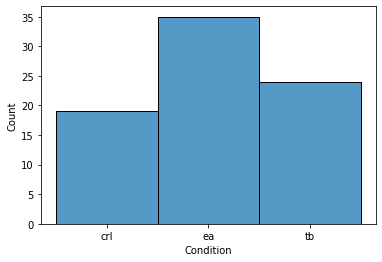

In [10]:
# get value counts for condition param and a histogram
print(df["Condition"].value_counts())
sns.histplot(data=df, x="Condition")

29


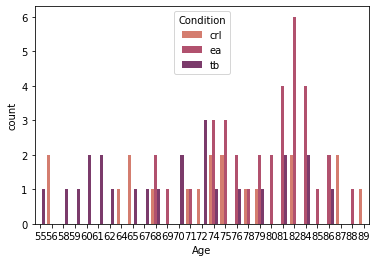

In [11]:
print(df["Age"].nunique())
colors = ["lightpink", "blue", "purple"]
#sns.histplot(x=df["Age"], hue=df["Condition"], bins=27, kde=True, palette=colors)
sns.countplot(x=df["Age"], hue=df["Condition"], palette="flare")#, kde=True, palette=colors)

In [12]:
# exclude biomakers that are outliers (marker = 2.5std+avg)
biomarkers = ["IL1", "IL6", "TNF", "PGJ2", "PGE2", "BDNF", "NGF"]
for i in biomarkers:
  upper_outlier = df[i].mean() + (2.5*df[i].std())
  lower_outlier = df[i].mean() - (2.5*df[i].std())
  df = df.loc[(df[i]<upper_outlier)]
  df = df.loc[(df[i]>lower_outlier)]
print(df.shape)

(64, 11)


In [13]:
# normalize biomarker data by z-scoring
df[biomarkers] = df[biomarkers].apply(zscore)

Text(0.5, 1.0, 'Biomarker Distribution')

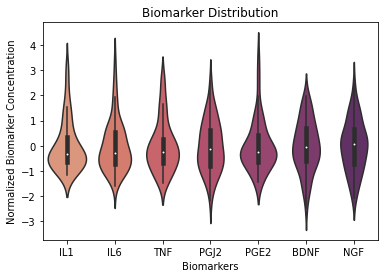

In [14]:
# get distribution plots for each biomarker
# these aren't very helpful because they lump all the conditions together
sns.violinplot(data=df[biomarkers], inner="box", palette="flare")
plt.ylabel("Normalized Biomarker Concentration")
plt.xlabel("Biomarkers")
plt.title("Biomarker Distribution")

Text(0.5, 1.0, 'Biomarker Distribution per Condition')

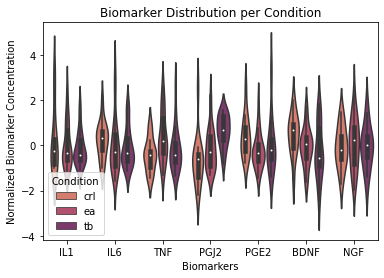

In [15]:
# let's get distribution plots for each biomarker per condition
# first transform data from wide to long format so we can use the "hue" parameter in violinplot
melted= pd.melt(df, id_vars=["Condition"], value_vars=biomarkers)
sns.violinplot(data=melted, x="variable", y="value", hue="Condition", palette="flare")
plt.ylabel("Normalized Biomarker Concentration")
plt.xlabel("Biomarkers")
plt.title("Biomarker Distribution per Condition")

In [16]:
# create a subset dataframe that includes only alzheimers and control
alz = df[["Condition", "IL1", "IL6", "TNF", "PGJ2", "PGE2", "BDNF", "NGF"]]
alz = alz[alz.Condition != "tb"]

# create a subset dataframe that includes only late onset bipolar and control
lobd = df[["Condition", "IL1", "IL6", "TNF", "PGJ2", "PGE2", "BDNF", "NGF"]]
lobd = lobd[lobd.Condition != "ea"]

# convert crl/ea to indicator variables
df_one = pd.get_dummies(alz["Condition"])
df_two = pd.concat((df_one, alz), axis=1)
df_two = df_two.drop(["Condition", "crl"], axis=1)
binary_ad = df_two.rename(columns={"ea": "Condition"})
binary_ad.head()

# convert crl/tb to indicator variables
df_one = pd.get_dummies(lobd["Condition"])
df_two = pd.concat((df_one, lobd), axis=1)
df_two = df_two.drop(["Condition", "crl"], axis=1)
binary_bp = df_two.rename(columns={"tb": "Condition"})
binary_bp.head()

,Condition,IL1,IL6,TNF,PGJ2,PGE2,BDNF,NGF
0,0,-0.521543,0.102536,-0.440248,-1.662412,2.564718,-0.305992,-0.328404
1,0,-0.756831,1.936854,-0.410368,-0.338194,0.438504,0.891055,-0.663266
2,0,2.929876,0.689718,0.784841,2.552703,-0.305868,-0.328772,1.172566
3,0,-0.835261,-0.264328,-1.276895,-1.587808,1.340299,0.657568,1.461466
4,0,0.145195,0.542922,-0.410368,-2.184638,-0.576606,0.697432,-0.119608


In [17]:
# logistic regression - control vs AD 
print("Control vs AD")
log_reg1 = smf.logit("Condition ~ IL1 + IL6 + TNF + PGJ2 + PGE2 + BDNF + NGF", data=binary_ad).fit()
print(log_reg1.summary())

Control vs AD
Optimization terminated successfully.
         Current function value: 0.223500
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Condition   No. Observations:                   42
Model:                          Logit   Df Residuals:                       34
Method:                           MLE   Df Model:                            7
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                  0.6489
Time:                        14:43:53   Log-Likelihood:                -9.3870
converged:                       True   LL-Null:                       -26.734
Covariance Type:            nonrobust   LLR p-value:                 1.277e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0411      1.327      2.292      0.022       0.440       5.642
IL1           -

In [18]:
# logistic regression - control vs LOBD
print("Control vs LOBD")
log_reg2 = smf.logit("Condition ~ IL1 + IL6 + TNF + PGJ2 + PGE2 + BDNF + NGF", data=binary_bp).fit()
print(log_reg2.summary())

Control vs LOBD
Optimization terminated successfully.
         Current function value: 0.306200
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Condition   No. Observations:                   36
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            7
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                  0.5418
Time:                        14:43:53   Log-Likelihood:                -11.023
converged:                       True   LL-Null:                       -24.057
Covariance Type:            nonrobust   LLR p-value:                 0.0004899
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7549      1.015      1.728      0.084      -0.235       3.745
IL1          

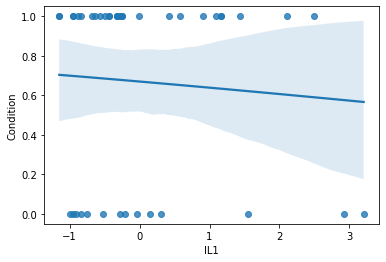

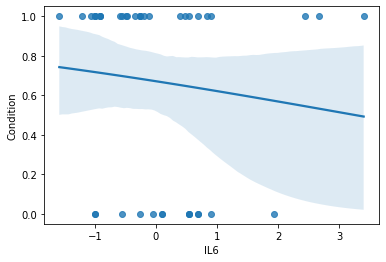

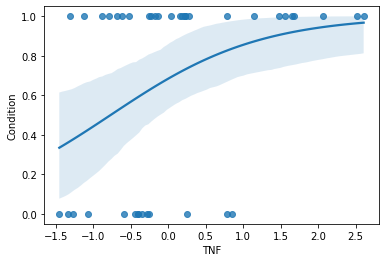

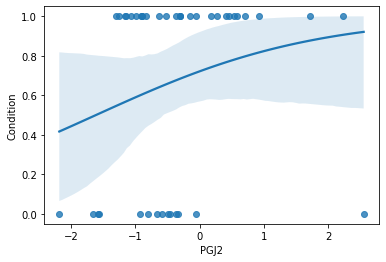

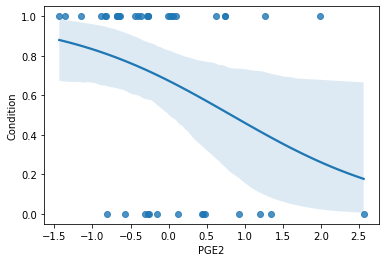

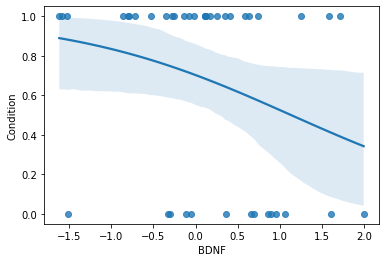

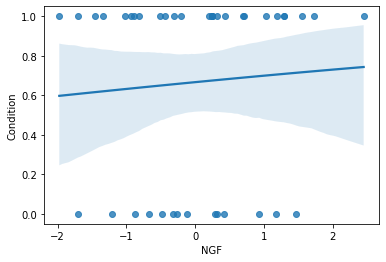

In [19]:
# logistic regression for control vs AD per biomarkers
# more sinusoidal shapes indicate that the biomarker has a more significant effect on control vs AD condition
for i in biomarkers:
  sns.regplot(y="Condition", x=i, data=binary_ad, logistic=True)
  plt.show()

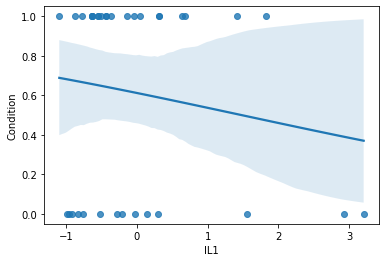

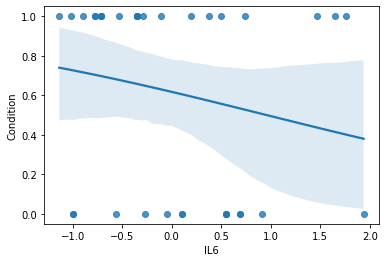

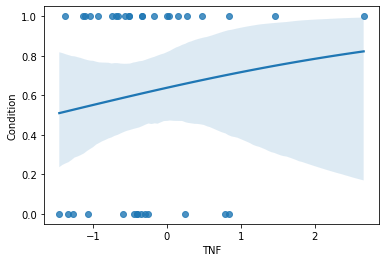

/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


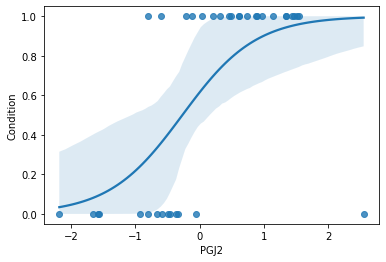

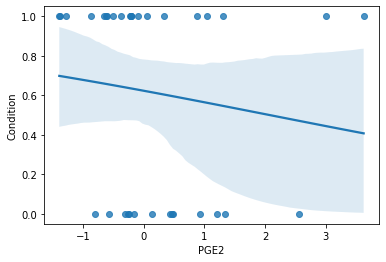

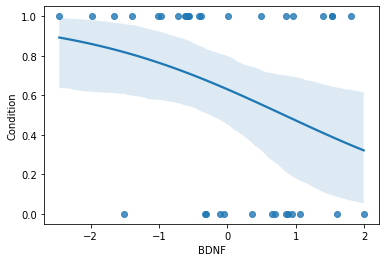

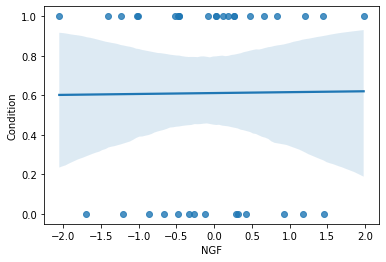

In [20]:
# logistic regression for control vs LOBD per biomarkers
# more sinusoidal shapes indicate that the biomarker has a more significant effect on control vs LOBD condition
for i in biomarkers:
  sns.regplot(y="Condition", x=i, data=binary_bp, logistic=True)
  plt.show()

In [21]:
# compare slopes of biomarkers between AD logistic regression and LOBD logisitic regression and determine if they are significant
# if pval < 0.05, the slope is significantly different, meaning that the specific biomarkers for AD and LOBD are different
# if pval > 0.05, the slope is not significantly different, meaning that the biomarkers are similar for AD and LOBD
t_value = lambda b1, b2, s1, s2 : (b1-b2)/np.sqrt(s1**2 + s2**2)
df = log_reg1.df_model + log_reg1.df_resid + log_reg2.df_model + log_reg2.df_resid - 4 
p_values = {}

for bio in biomarkers: 
  temp = t_value(log_reg1.params[bio], log_reg2.params[bio], log_reg1.bse[bio], log_reg2.bse[bio])
  p_values[bio] = scipy.stats.t.sf(abs(temp), df)

p_values

{'IL1': 0.4225927140003683,
 'IL6': 0.4961241247889039,
 'TNF': 0.3745672824417241,
 'PGJ2': 0.09883158130506635,
 'PGE2': 0.05918011319320679,
 'BDNF': 0.07445322118263474,
 'NGF': 0.20697574845164324}